In [6]:
#BLOCK1

In [6]:
#Ex1

In [9]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

In [11]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [13]:
#iris.data — это матрица с числовыми признаками (длина/ширина чашелистика и лепестка) для каждого цветка.
#iris.target — это массив с метками классов (Setosa, Versicolor, Virginica) для каждого цветка.

In [15]:
# Create a DataFrame for better visualization
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)

In [17]:
# Use SelectKBest to select the top 2 features
selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)

In [19]:
#X: Массив данных с признаками (размерность (150, 4)) — это четыре признака для каждого из 150 цветков ириса.
#y: Целевая переменная — массив меток классов (0, 1, 2), которые представляют три вида ирисов.

In [23]:
#score_func=chi2: Это аргумент, который определяет, какую функцию использовать для оценки "важности" признаков. 
#В данном случае, используется тест хи-квадрат (chi-squared), который применяется для категориальных данных. 
#Этот тест вычисляет зависимость каждого признака с целевой переменной (в данном случае это классы ирисов) 
#и помогает выбрать признаки с наибольшей значимостью.

#k=2: Это аргумент, который указывает, сколько признаков нужно выбрать. В данном случае, выбираются 2 лучших признака из всех доступных (из 4 признаков).

In [27]:
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

In [29]:
# Print the selected feature names
selected_feature_names = [feature_names[i] for i in selected_indices]
print("Selected feature names:", selected_feature_names)

Selected feature names: ['petal length (cm)', 'petal width (cm)']


In [31]:
#Метод get_support(indices=True) из объекта SelectKBest возвращает индексы признаков, которые были выбраны как лучшие. 
#Эти индексы соответствуют позициям признаков в исходном наборе данных.

In [33]:
#Лучшие признаки (или наиболее значимые признаки) — это те признаки (характеристики) данных, 
#которые оказывают наибольшее влияние на целевую переменную в задаче машинного обучения.

In [35]:
#Лучшие признаки — это те, которые имеют наибольшую корреляцию или статистическую связь с целевой переменной. 
#В зависимости от задачи и метода оценки, лучшими признаками могут считаться те, которые:

#Наиболее четко разделяют классы (в задаче классификации).
#Наиболее сильно влияют на предсказание целевой переменной (в задаче регрессии).

In [37]:
#Тест хи-квадрат (chi-squared), который используется в твоем коде, измеряет зависимость между признаками и целевой переменной, 
#помогая выявить признаки, которые наиболее сильно связаны с целевыми классами.

In [39]:
#Ex2

In [41]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [43]:
# 1. Загрузим набор данных Wine
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

In [45]:
# 2. Разделим данные на обучающую и тестовую выборки (например, 70% на обучение и 30% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# 3. Обучим Random Forest классификатор на обучающих данных
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# 4. Извлечем важности признаков
importances = rf.feature_importances_

In [51]:
# Создадим DataFrame для удобства визуализации
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

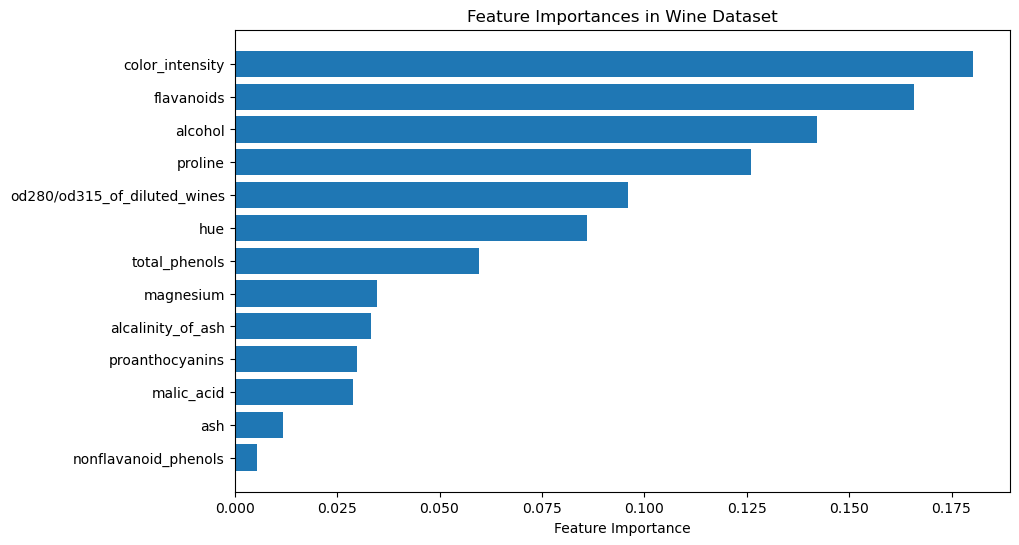

In [53]:
# 5. Визуализируем важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Wine Dataset')
plt.gca().invert_yaxis()  # Переворачиваем ось, чтобы самые важные признаки были наверху
plt.show()

In [55]:
#Ex3

In [57]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [59]:
# 1. Загрузим набор данных Breast Cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

In [61]:
# 2. Разделим данные на обучающую и тестовую выборки (80% на обучение, 20% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# 3. Используем SVM с линейным ядром для отбора признаков с помощью RFE
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=10)  # Отбираем 10 лучших признаков
rfe.fit(X_train, y_train)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)

In [65]:
# 4. Получим маску выбранных признаков
selected_features = rfe.support_

In [67]:
# Выведем названия выбранных признаков
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_features[i]]
print("Selected features:", selected_feature_names)

Selected features: ['mean radius', 'mean concavity', 'mean concave points', 'texture error', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']


In [69]:
# 5. Обучим SVM на отобранных признаках
X_train_selected = rfe.transform(X_train)  # Используем только выбранные признаки
X_test_selected = rfe.transform(X_test)

In [71]:
# Обучим модель SVM
svc.fit(X_train_selected, y_train)

SVC(kernel='linear')

In [73]:
# 6. Оценим производительность модели
y_pred = svc.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM with selected features: {accuracy:.4f}")

Accuracy of SVM with selected features: 0.9737


In [75]:
#RFE (рекурсивное исключение признаков) — это метод отбора признаков, который удаляет менее важные признаки, чтобы получить более компактное представление данных.
#SVM с линейным ядром используется в качестве классификатора, который помогает оценивать важность каждого признака на каждом шаге исключения.

In [77]:
#Этот код демонстрирует, как можно использовать RFE для отбора наиболее значимых признаков из набора данных и как обучить модель SVM на этих признаках для улучшения интерпретируемости и, возможно, производительности модели.

In [79]:
#Ex4

In [81]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [83]:
# 1. Загрузим набор данных Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

In [85]:
# 2. Разделим данные на обучающую и тестовую выборки (например, 80% на обучение и 20% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# 3. Применим Lasso регрессию для отбора признаков
# Lasso использует L1-регуляризацию, которая может занулять коэффициенты менее важных признаков
lasso = Lasso(alpha=0.1)  # alpha регулирует степень регуляризации
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [89]:
# Получим маску отобранных признаков (признаки с ненулевыми коэффициентами)
selected_features = np.abs(lasso.coef_) > 0

In [91]:
# Выведем названия отобранных признаков
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_features[i]]
print("Selected features:", selected_feature_names)

Selected features: ['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']


In [93]:
# 4. Обучим модель линейной регрессии на отобранных признаках
X_train_selected = X_train[:, selected_features]  # Используем только отобранные признаки
X_test_selected = X_test[:, selected_features]

In [95]:
# Обучим модель на выбранных признаках
model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

In [97]:
# 5. Оценим производительность модели
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error using selected features: {mse:.4f}")

Mean Squared Error using selected features: 2828.9022


In [99]:
#Lasso (Least Absolute Shrinkage and Selection Operator) — это метод регрессии с L1-регуляризацией. Он зануляет коэффициенты малозначимых признаков, тем самым выполняя отбор признаков.
#Параметр alpha=0.1 регулирует степень регуляризации: чем выше значение, тем больше регуляризация и тем больше коэффициентов признаков может быть занулено.

In [101]:
#Оценим модель по метрике Mean Squared Error (MSE), которая измеряет среднее квадратичное отклонение предсказанных значений от реальных.

In [103]:
#Мы применили Lasso регрессию для отбора наиболее значимых признаков, обучили модель линейной регрессии на этих признаках и оценили производительность модели. 
#Lasso помогает автоматически выбрать признаки, уменьшая влияние менее важных и потенциально улучшая обобщающую способность модели.

In [2]:
#BLOCK2

In [8]:
#Ex1

In [10]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# 1. Загрузим набор данных Iris
iris = load_iris()
X = iris.data
y = iris.target

In [14]:
# 2. Разделим данные на обучающую и тестовую выборки (например, 80% на обучение, 20% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 3. Обучим модель логистической регрессии
log_reg = LogisticRegression(max_iter=200)  # Увеличим max_iter, если потребуется для сходимости
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [18]:
# 4. Предскажем классы на тестовых данных
y_pred = log_reg.predict(X_test)

In [20]:
# 5. Оценим точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [22]:
# 6. Выведем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


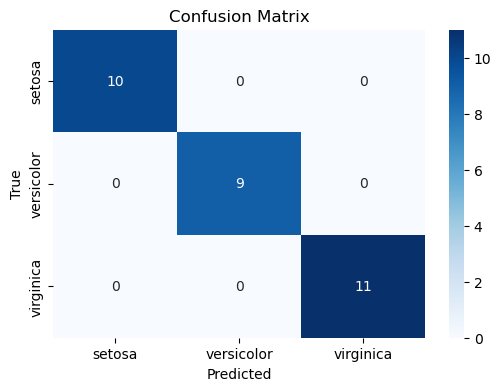

In [24]:
# Визуализируем матрицу ошибок
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
#Обучаем модель логистической регрессии на обучающих данных. 
#Параметр max_iter=200 увеличивает максимальное количество итераций, если требуется для сходимости модели.

In [28]:
#Вычисляем точность модели с помощью функции accuracy_score, которая показывает долю правильных предсказаний.

In [30]:
#Матрица ошибок (confusion matrix) показывает количество верных и ошибочных предсказаний по каждому классу. 
#Строки матрицы представляют истинные классы, а столбцы — предсказанные классы.
#Также визуализируем матрицу ошибок с помощью библиотеки seaborn для удобства интерпретации.

In [32]:
#Ex2

In [34]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# 1. Загрузим набор данных Breast Cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [38]:
# 2. Разделим данные на обучающую и тестовую выборки (80% на обучение, 20% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# 3. Обучим модель SVM
svm_model = SVC(kernel='linear')  # Используем линейное ядро для SVM
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
# 4. Предскажем классы на тестовых данных
y_pred = svm_model.predict(X_test)

In [44]:
# 5. Оценим точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9561


In [46]:
# 6. Выведем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[39  4]
 [ 1 70]]


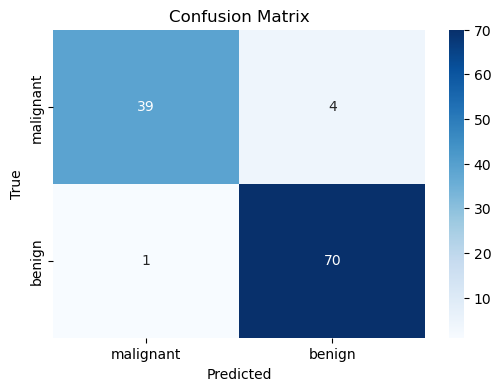

In [48]:
# Визуализируем матрицу ошибок
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [50]:
#SVM (Support Vector Machine) — это мощный алгоритм машинного обучения, который используется для задач классификации и регрессии. 
#В контексте классификации (как в задаче с набором данных Breast Cancer), SVM ищет гиперплоскость, которая максимально разделяет классы данных в пространстве признаков. 
#Вот более детальное объяснение того, как работает SVM и как его применить в нашей задаче:

In [52]:
#Гиперплоскость:

#В задачах классификации SVM ищет гиперплоскость, которая разделяет данные на два класса. 
#Для двумерных данных гиперплоскость — это линия, для трёхмерных — плоскость, а в многомерных данных — это гиперплоскость.
#Максимизация отступа:

#SVM стремится найти гиперплоскость, которая максимизирует отступ (margin) — 
#расстояние между гиперплоскостью и ближайшими точками данных из каждого класса. Эти ближайшие точки называются опорными векторами (support vectors).
#Ядра (Kernel Trick):

#Для линейно неразделимых данных используется трик ядра. SVM преобразует данные в более высокое измерение, где они становятся линейно разделимыми.
#В зависимости от сложности задачи, используются разные ядра:
#Линейное ядро (kernel='linear') — для линейно разделимых данных.
#Полиномиальное ядро (kernel='poly') — для более сложных разделений.
#Радиально-базисная функция (RBF, kernel='rbf') — для сильно нелинейных данных.

In [66]:
#Ex3

In [54]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [56]:
# 1. Загрузим набор данных Wine
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
class_names = wine.target_names

In [58]:
# 2. Разделим данные на обучающую и тестовую выборки (например, 80% на обучение, 20% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# 3. Обучим классификатор дерева решений
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

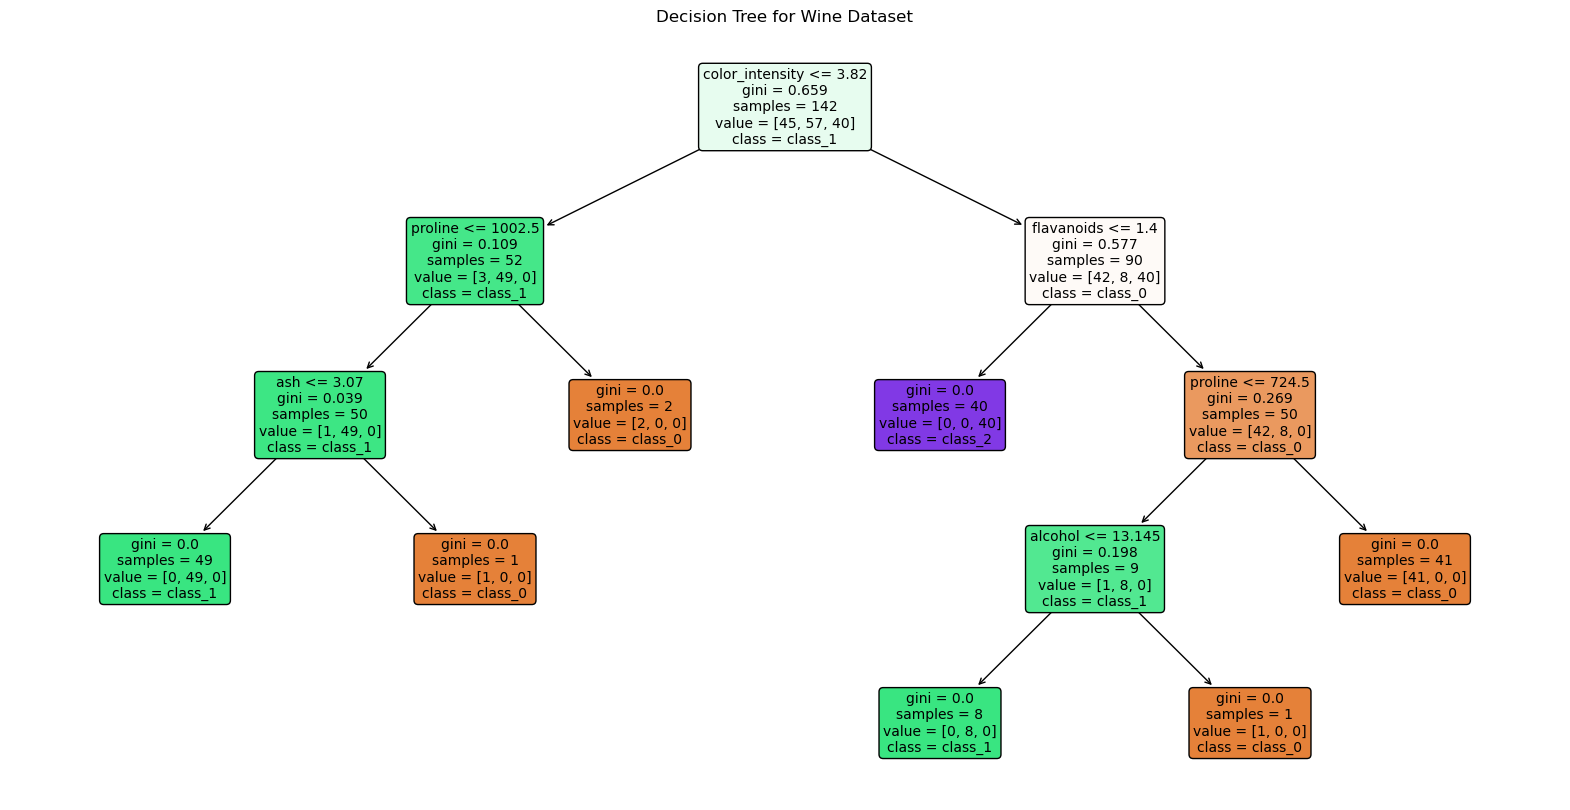

In [62]:
# 4. Визуализируем дерево решений
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Wine Dataset")
plt.show()

In [64]:
#Обучение модели Decision Tree:

#Мы создаем и обучаем модель дерева решений с помощью класса DecisionTreeClassifier из sklearn.tree. 
#Параметр random_state=42 используется для воспроизводимости результатов.
#Визуализация дерева решений:

#Для визуализации дерева решений используем функцию plot_tree из sklearn.tree. 
#Параметры feature_names и class_names позволяют отображать названия признаков и классов на графике. 
#Опции filled=True и rounded=True делают визуализацию более наглядной, заполняя узлы цветами в зависимости от класса.

In [68]:
#BLOCK3

In [70]:
#Ex1

In [76]:
#load_boston has been removed from scikit-learn since version 1.2.     ->       Использование другого набора данных — California Housing

In [74]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [78]:
# Загрузим набор данных California Housing
california = fetch_california_housing()
X = california.data  # Признаки
y = california.target  # Целевая переменная (цены на жилье)

In [80]:
# Разделим данные на обучающую и тестовую выборки (80% обучение, 20% тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Обучим модель линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [84]:
# Предскажем значения для тестовой выборки
y_pred = lr_model.predict(X_test)

In [86]:
# Оценим модель с помощью метрик MSE и R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [88]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.5559
R-squared (R²): 0.5758


In [90]:
#MSE указывает на точность предсказаний модели: чем меньше значение, тем лучше.
#R² показывает, насколько хорошо модель объясняет изменчивость данных: значение, близкое к 1, свидетельствует о высоком качестве модели.

#MSE (среднеквадратичная ошибка) измеряет средний квадрат разности между предсказанными и фактическими значениями. Чем меньше MSE, тем лучше модель.
#R² (коэффициент детерминации) показывает, какая часть дисперсии целевой переменной объясняется моделью. 
#Значение R² варьируется от 0 до 1, где 1 — это идеальная модель.

In [92]:
#Ex2

In [94]:
# Импортируем необходимые библиотеки
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
# 1. Загрузим набор данных Diabetes
diabetes = load_diabetes()
X = diabetes.data  # Признаки
y = diabetes.target  # Целевая переменная (уровень диабета)

In [98]:
# 2. Разделим данные на обучающую и тестовую выборки (80% для обучения и 20% для тестирования)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# 3. Обучим модель Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Параметр регуляризации alpha=1.0
ridge_model.fit(X_train, y_train)

Ridge()

In [102]:
# 4. Предскажем значения для тестовой выборки
y_pred = ridge_model.predict(X_test)

In [104]:
# Среднеквадратичная ошибка (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 3077.4159


In [106]:
# Коэффициент детерминации (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.4f}")

R-squared (R²): 0.4192


In [108]:
#Ridge Regression — это линейная регрессия с регуляризацией, которая предотвращает переобучение, добавляя штраф за слишком большие коэффициенты регрессии. 
#Параметр alpha контролирует силу регуляризации (чем больше значение, тем сильнее регуляризация).

In [2]:
#Ex3

In [19]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

In [21]:
# 1. Загрузим набор данных California Housing
california = fetch_california_housing()
X = california.data  # Признаки
y = california.target  # Целевая переменная (цены на жилье)

In [23]:
# 2. Разделим данные на обучающую и тестовую выборки (80% для обучения и 20% для тестирования)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# 3. Обучим модель Decision Tree Regressor
# Ограничим глубину дерева до 3, чтобы упростить визуализацию(так быстрее и меньше ресурсов понадобится)
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [35]:
# 4. Предскажем значения для тестовой выборки
y_pred = dt_regressor.predict(X_test)

In [37]:
# Оценим производительность модели с помощью MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.6424


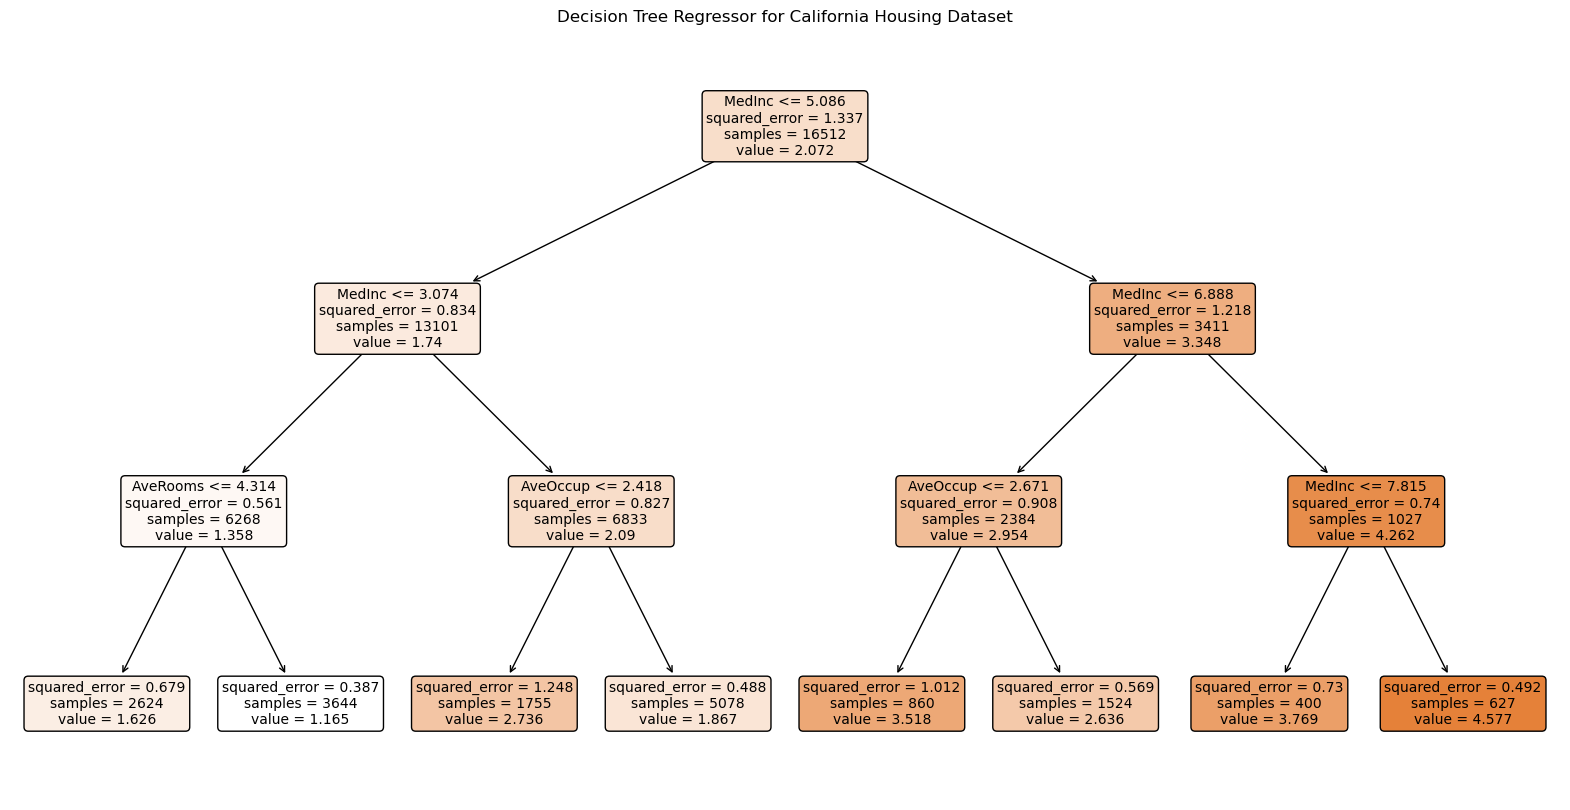

In [39]:
# 5. Визуализируем дерево решений
plt.figure(figsize=(20,10))
plot_tree(dt_regressor, feature_names=california.feature_names, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Regressor for California Housing Dataset")
plt.show()